# Hands on with SSD300
This notebook demonstrates a standardized pipeline for utilizing pre-trained models (SSD) and their associated weights from the Torch Hub.

## Resources
- [Torch Vision Model](https://pytorch.org/vision/stable/models.html) : List of available models and weights.
- [Torch Official Tutorial](https://pytorch.org/hub/pytorch_vision_resnet/) : Tutorial on basic pytorch.
- [Torch SSD_VGG](https://pytorch.org/vision/main/models/ssd.html): Pytoch module on SSD_VGG
- [Nvidia Hub implementation](https://pytorch.org/hub/nvidia_deeplearningexamples_ssd/) : nvidia's hosted ssd on pytorch hub, with resnet-50 instead of vgg model as backbone.

# Summary 
## One Cell scripts for inference on Model and Inference
Experienced users may skip the explanatory sections that follows.

/home/howt/mambaforge/envs/py310cv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/howt/mambaforge/envs/py310cv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to /home/howt/.cache/torch/hub/checkpoints/ssd300_vgg16_coco-b556d3b4.pth
100%|██████████| 136M/136M [00:44<00:00, 3.19MB/s]   


cat 0.9444538354873657
dog 0.1663467288017273
potted plant 0.14897696673870087


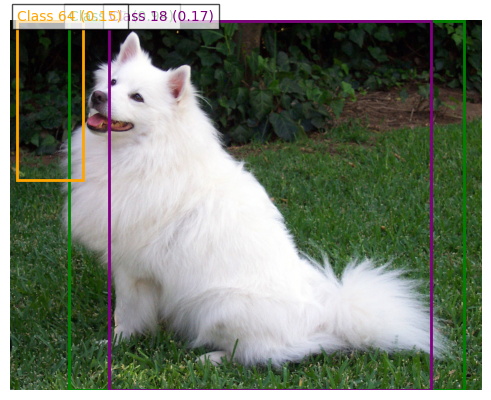

In [1]:
import torch
import torchvision
from torchvision.transforms import functional as F
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from torchinfo import summary
import urllib

# Load the pre-trained SSD300 VGG16 model
weights = torchvision.models.detection.SSD300_VGG16_Weights.DEFAULT
ssd_model = torchvision.models.detection.ssd300_vgg16(pretrained=True, box_score_thresh=0.9)
ssd_model.eval()  # Set the model to evaluation mode

# Load an example image
# Download an example image from the pytorch website
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)
image = Image.open(filename)

# Preprocess the image (adjust based on model requirements)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
processed_image = transform(image).unsqueeze(0)

# Label Encoding
id_2_label = {idx:x for idx,x in enumerate(weights.meta["categories"])}

# Run inference
with torch.no_grad():
    prediction = ssd_model(processed_image)[0]

# Extract bounding boxes, labels, and scores
boxes = prediction['boxes']
labels = prediction['labels']
scores = prediction['scores']

# Visualize the results
class_colors = ['red', 'blue', 'green', 'purple', 'orange']

plt.imshow(image)
for box, label, score in zip(boxes, labels, scores):
  if score > 0.1:
    class_id = label.item()  # Get the class ID
    class_color = class_colors[class_id % len(class_colors)]  # Assign a color based on class ID
    print(id_2_label[label.item()], score.item())
    plt.gca().add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                      fill=False, edgecolor=class_color, linewidth=2))
    plt.text(box[0], box[1], f"Class {label.item()} ({score:.2f})", color=class_color, fontsize=10,
             bbox=dict(facecolor='white', alpha=0.7))
plt.axis('off')
plt.show()


# Explanatory Breakdown

The PyTorch vision library provides a comprehensive selection of pre-trained object detection models, as detailed in the official PyTorch documentation: https://pytorch.org/vision/stable/models.html. (Please refer to the object detection section)

## 1. Model Loading - SSD300
The loaded model utilizes a pre-trained Single-Shot MultiBox Detector (SSD300) architecture built upon a VGG16 convolutional neural network (CNN). This model is classified as a single-stage object detector, characterized by its ability to generate object detections in a single forward pass, making it a efficient and fast detection solution.

In [2]:
from torchinfo import summary
import torchvision
# Load the pre-trained SSD300 VGG16 model
weights = torchvision.models.detection.SSD300_VGG16_Weights.DEFAULT
ssd_model = torchvision.models.detection.ssd300_vgg16(pretrained=True, box_score_thresh=0.9)
ssd_model.eval()  # Set the model to evaluation mode
summary(ssd_model)

Layer (type:depth-idx)                   Param #
SSD                                      --
├─SSDFeatureExtractorVGG: 1-1            512
│    └─Sequential: 2-1                   --
│    │    └─Conv2d: 3-1                  (1,792)
│    │    └─ReLU: 3-2                    --
│    │    └─Conv2d: 3-3                  (36,928)
│    │    └─ReLU: 3-4                    --
│    │    └─MaxPool2d: 3-5               --
│    │    └─Conv2d: 3-6                  73,856
│    │    └─ReLU: 3-7                    --
│    │    └─Conv2d: 3-8                  147,584
│    │    └─ReLU: 3-9                    --
│    │    └─MaxPool2d: 3-10              --
│    │    └─Conv2d: 3-11                 295,168
│    │    └─ReLU: 3-12                   --
│    │    └─Conv2d: 3-13                 590,080
│    │    └─ReLU: 3-14                   --
│    │    └─Conv2d: 3-15                 590,080
│    │    └─ReLU: 3-16                   --
│    │    └─MaxPool2d: 3-17              --
│    │    └─Conv2d: 3-18           

## 2. Image loading with PIL Image

In [3]:
from PIL import Image
# Load an example image
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)
image = Image.open(filename)

## 3. Preprocess the image
Define a transformation pipeline (adjust based on model requirements). 
 - The pixels value are normalised here, with the mean and standard deviation values for the ImageNet dataset.
 - The transformed image is then batched into a unit of 1 (via unsqueeze)

In [4]:
from torchvision import transforms
## Preprocess the image
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
processed_image = transform(image).unsqueeze(0)
processed_image.shape

torch.Size([1, 3, 1213, 1546])

## 4. Model inference

In [5]:
# Run inference
with torch.no_grad():
    detections = ssd_model(processed_image)

## 5. Extracting and Visualising the output
- Object detection models' result consists of a dictionary of boxes, labels and scores. 
- The respectives keys extracted into a seperate list, which are then plotted out.

cat 0.9444538354873657
dog 0.1663467288017273
potted plant 0.14897696673870087


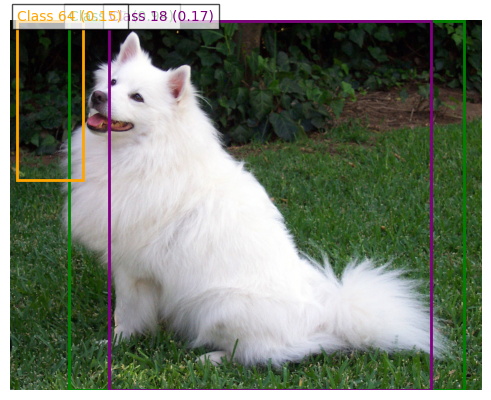

In [6]:
# Extract bounding boxes, labels, and scores
boxes = prediction['boxes']
labels = prediction['labels']
scores = prediction['scores']

# Visualize the results
class_colors = ['red', 'blue', 'green', 'purple', 'orange']

plt.imshow(image)
for box, label, score in zip(boxes, labels, scores):
  if score > 0.1:
    class_id = label.item()  # Get the class ID
    class_color = class_colors[class_id % len(class_colors)]  # Assign a color based on class ID
    print(id_2_label[label.item()], score.item())
    plt.gca().add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                      fill=False, edgecolor=class_color, linewidth=2))
    plt.text(box[0], box[1], f"Class {label.item()} ({score:.2f})", color=class_color, fontsize=10,
             bbox=dict(facecolor='white', alpha=0.7))
plt.axis('off')
plt.show()